### Übungsblatt 5 - Cluster Algorithmen

In [1]:
import src.cluster.cluster_algorithm as Ca
from src.Graph import Graph
from src.printGraph import draw_graph

import matplotlib.pyplot as plt
from time import time

Min Cut Algorithmus

Algorithmus von Stoer und Wagner. Findet mehrere Cuts und wählt den minimalen aus. Wir haben den Algorithmus so abgewandelt, dass er den minimum cut auf einem Cluster findet.

Der Algorithmus gibt die Menge die 'abgeschnitten' wird und das Gewicht des Schnitts.

In [2]:
G = Graph("networks/out.ucidata-zachary_")

# example of minimum cut on entire Graph
print(Ca.find_minimum_cut(G, G.get_nodes()))

[{'12'}, 1]


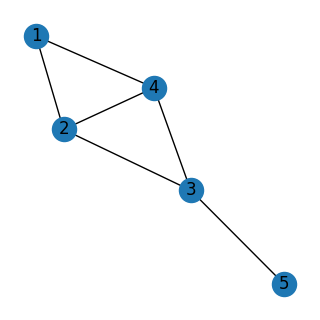

In [3]:
G = Graph()

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)
G.add_edge(2, 4)
G.add_edge(3, 5)

fig = plt.figure(figsize=(3, 3))
draw_graph(G, label_on=True)

In [4]:
# Anwendungsbeispiel
nodes = G.get_nodes()
result = Ca.find_minimum_cut(G, nodes)
print(result)

new_nodes = nodes - result[0]
if '5' in new_nodes:
    new_nodes = result[0]
result = Ca.find_minimum_cut(G, new_nodes)
print(result)

[{'5'}, 1]
[{'3'}, 2]


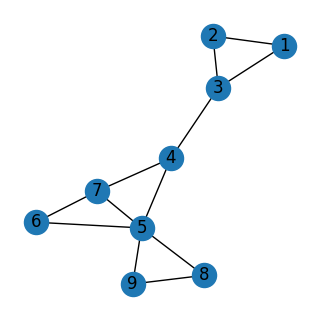

In [7]:
G = Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(7, 4)
G.add_edge(5, 7)
G.add_edge(5, 8)
G.add_edge(8, 9)
G.add_edge(9, 5)

fig = plt.figure(figsize=(3, 3))
draw_graph(G, label_on=True)

In [11]:
print(Ca.first_heuristic(G))
print(Ca.first_heuristic(G, version="dis"))

([{'9', '4', '8', '1', '6', '2', '3', '7', '5'}], 0.875)
([{'1', '6', '2', '9', '4', '7', '8'}, {'3', '5'}], -2.0)


In [6]:
# Laufzeit auf vollen Graphen -> Algorithmus wurde nicht weiter optmiert
for path in ["networks/bio-celegans.mtx", "networks/out.adjnoun_adjacency_adjacency_", "networks/out.moreno_zebra_zebra_", "networks/out.ucidata-zachary_", "networks/special_case_for_networkx.mtx"]:
    try:
        G = Graph(path)
    except:
        G = Graph(path, mode=Graph.READ_MOD_METIS)
    start = time()
    Ca.find_minimum_cut(G)
    print(f"Min Cut Algorithm for n={G.n} and m={G.m} neede {time() - start} seconds.")


Min Cut Algorithm for n=453 and m=2025 neede 41.435513496398926 seconds.
Min Cut Algorithm for n=112 and m=425 neede 0.5947918891906738 seconds.
Min Cut Algorithm for n=27 and m=111 neede 0.008714437484741211 seconds.
Min Cut Algorithm for n=34 and m=78 neede 0.012725591659545898 seconds.
Min Cut Algorithm for n=12 and m=15 neede 0.0009999275207519531 seconds.
